In [109]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
pylab.rcParams['figure.figsize'] = (17,8)

In [2]:
import pandas as pd
import networkx as nx
import scanpy as sc
#is sc necessary?

# Importing necessary parquet data files

In [ ]:
parquet_file = '/Users/vyinkabanjo/Documents/UROP Stuff/Weissman Lab/CRISPRi Computational/K562_gwps_guides.parquet'

In [ ]:
df = pd.read_parquet(parquet_file)

In [ ]:
df

In [ ]:
guides_parquet = '/Users/vyinkabanjo/Documents/UROP Stuff/Weissman Lab/CRISPRi Computational/K562_gwps_guide_library.parquet'

In [ ]:
df_guides = pd.read_parquet(guides_parquet)

In [ ]:
df_guides

# Playing with data to understand trends & identify outliers

In [113]:
subset = df[(df["num_cells_filtered"] > 45) &
   (df["control_expr"] >= .30) & (df["core_control"] == False)].sort_values('pct_expr', ascending = True)

#create a subset where at least 45 cells (large enough sample size) were pooled to analyze that specific RNA seq
#RNA is expressed at least once in every 3 out of 10 cells?
#not associate with a non-targeting gRNA

#negative vs positive pct_expr??
#what value of the num_cells_filtered is reasonable for reliable results?
#can see that we now have all regular pct_expr values by getting rid of this noise

In [114]:
fold = subset[(subset["fold_expr"] > 0.05)]

#gRNA when average percent of gene knowcked down across all cells is > 5%
#is 5% to high or too low for a threshold?

In [115]:
fold
#what does it mean when we have a positive fold_expr and sum total of fold_expr + pct_expr does not add up to 1?

,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,energy_test_p_value,anderson_darling_counts,mann_whitney_counts,z_gemgroup_UMI,mitopercent,TE_ratio,cnv_score_z
gene_transcript,,,,,,,,,,,,,,,,
273_ALG8_P1P2_ENSG00000159063,11216.020508,142,139.0,0.571546,0.050168,-0.949832,False,0.215964,1.150573,0.317368,1,1,-0.006786,0.118843,0.013533,0.370015
8816_TELO2_P1P2_ENSG00000100726,8282.301758,86,80.0,0.322988,0.050195,-0.949805,False,1.283558,0.985201,0.000100,1881,1130,-0.697804,0.146905,0.019737,2.360925
3436_RACK1_P1P2_ENSG00000204628,9153.451172,51,50.0,30.468440,0.050276,-0.949724,False,0.815389,0.948134,0.000100,549,402,-0.514263,0.129546,0.016034,-0.488269
2304_DNAJC8_P1P2_ENSG00000126698,10969.998047,501,488.0,2.394241,0.050308,-0.949692,False,0.296402,0.872216,0.000100,408,349,-0.016708,0.114814,0.015173,0.063983
5248_MRPS18A_P1P2_ENSG00000096080,11111.279297,190,184.0,0.537506,0.050496,-0.949504,False,0.520501,0.921065,0.000100,721,651,-0.021098,0.138124,0.013859,0.535828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881_FAM178B_P1P2_ENSG00000168754,11769.197266,212,203.0,1.366454,1.351957,0.351957,False,0.155054,0.955636,0.030097,10,9,0.132776,0.117035,0.013223,-0.837501
8860_TGFBR1_P1P2_ENSG00000106799,11836.468750,47,46.0,0.801680,1.378324,0.378324,False,0.691859,1.203275,0.000200,2,1,0.355916,0.113964,0.012832,3.764043
3258_GADD45A_P1P2_ENSG00000116717,11469.345703,90,88.0,1.344930,1.386814,0.386814,False,0.325478,0.900211,0.014499,1,1,-0.090256,0.123546,0.014264,0.254425


In [89]:
len (df[df["core_control"]])

514

In [92]:
noise = df[(df['pct_expr'] >1)].sort_values('pct_expr', ascending = False)

#noise = df[(df['pct_expr'] >1) or (df["control_expr"] < 0.5)].sort_values('pct_expr', ascending = False)

In [93]:
len (noise)

33

In [87]:
len (df)
#33 out of 11258! Insignificant?...

11258

In [94]:
len (subset)
#why is this so small? should my specification for the subset be as specific as I have made it?

4781

# Visualizing data (PLOTTING!)

<AxesSubplot:ylabel='Frequency'>

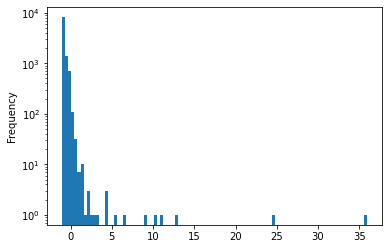

In [119]:
df.pct_expr.plot.hist(bins = 100,logy = True)

#what does the logy part mean?

In [121]:
subset

,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,energy_test_p_value,anderson_darling_counts,mann_whitney_counts,z_gemgroup_UMI,mitopercent,TE_ratio,cnv_score_z
gene_transcript,,,,,,,,,,,,,,,,
1514_CEP78_P1P2_ENSG00000148019,11410.722656,76,71.0,0.301622,0.000000,-1.000000,False,-0.110853,0.818247,0.030597,0,0,0.276322,0.119455,0.012359,-1.477755
6807_PRPSAP2_P1_ENSG00000141127,11543.603516,68,66.0,0.308270,0.000000,-1.000000,False,-0.059894,0.769381,0.180682,1,1,0.008503,0.119076,0.013655,-1.636109
5471_NAT14_P1P2_ENSG00000090971,11074.909180,99,97.0,0.317759,0.000000,-1.000000,False,0.296410,0.865055,0.252575,1,0,0.004944,0.121258,0.013588,-0.307904
5445_NADK_P1_ENSG00000008130,11533.515625,64,60.0,0.378859,0.000000,-1.000000,False,0.052662,0.941200,0.039096,2,2,0.193218,0.116141,0.014681,-0.941986
5155_MORN2_P1P2_ENSG00000188010,11692.784180,51,51.0,0.350914,0.000000,-1.000000,False,0.031668,0.841040,0.554445,0,0,0.125332,0.121980,0.013592,-0.428077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881_FAM178B_P1P2_ENSG00000168754,11769.197266,212,203.0,1.366454,1.351957,0.351957,False,0.155054,0.955636,0.030097,10,9,0.132776,0.117035,0.013223,-0.837501
8860_TGFBR1_P1P2_ENSG00000106799,11836.468750,47,46.0,0.801680,1.378324,0.378324,False,0.691859,1.203275,0.000200,2,1,0.355916,0.113964,0.012832,3.764043
3258_GADD45A_P1P2_ENSG00000116717,11469.345703,90,88.0,1.344930,1.386814,0.386814,False,0.325478,0.900211,0.014499,1,1,-0.090256,0.123546,0.014264,0.254425


<AxesSubplot:xlabel='fold_expr', ylabel='pct_expr'>

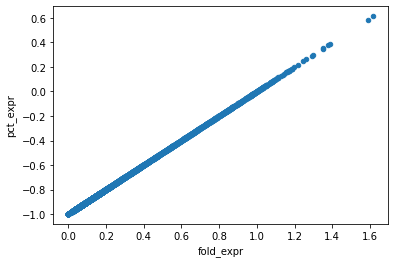

In [125]:
subset.plot.scatter (4,5)

<AxesSubplot:xlabel='control_expr', ylabel='fold_expr'>

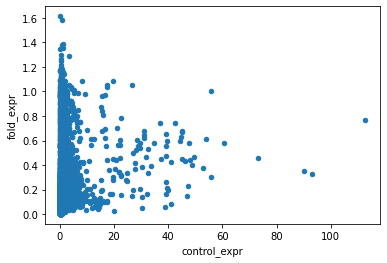

In [127]:
subset.plot.scatter (3,4)

# Merging guide library with perturb-seq results

In [ ]:
df_guides_new = df_guides.rename (columns={'unique sgRNA pair ID': 'gene_transcript'})

In [ ]:
df_guides_new

In [95]:
merged_table = pd.merge (subset, df_guides_new, on = 'gene_transcript')

In [96]:
merged_table
#qeustion: targetting sequence A vs. B?

,gene_transcript,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,...,cnv_score_z,gene,transcript,ensembl gene id,sgID_A,targeting sequence A,sgID_B,targeting sequence B,duplicated guide pair?,either guide duplicated?
0,1514_CEP78_P1P2_ENSG00000148019,11410.722656,76,71.0,0.301622,0.000000,-1.000000,False,-0.110853,0.818247,...,-1.477755,CEP78,P1P2,ENSG00000148019,CEP78_-_80851026.23-P1P2,GGCCTCAGAGGACTATGAGG,CEP78_+_80851030.23-P1P2,GGCCCTGCGGCCCAAGCAGT,False,False
1,6807_PRPSAP2_P1_ENSG00000141127,11543.603516,68,66.0,0.308270,0.000000,-1.000000,False,-0.059894,0.769381,...,-1.636109,PRPSAP2,P1,ENSG00000141127,PRPSAP2_+_18761855.23-P1,GACCACAGGTCCCATCATCA,PRPSAP2_+_18761907.23-P1,GTCAGCTTAGGGACGGAGAA,False,False
2,5471_NAT14_P1P2_ENSG00000090971,11074.909180,99,97.0,0.317759,0.000000,-1.000000,False,0.296410,0.865055,...,-0.307904,NAT14,P1P2,ENSG00000090971,NAT14_-_55996612.23-P1P2,GAACCTTGTCGAAGGACCAA,NAT14_+_55996616.23-P1P2,GGACCAGCAAGCACCTGCAC,False,False
3,5445_NADK_P1_ENSG00000008130,11533.515625,64,60.0,0.378859,0.000000,-1.000000,False,0.052662,0.941200,...,-0.941986,NADK,P1,ENSG00000008130,NADK_+_1709845.23-P1,GCGGGGTCCGGGCGGCCATG,NADK_+_1709806.23-P1,GGCCAAGGGCCAGGTAGCGA,False,False
4,5155_MORN2_P1P2_ENSG00000188010,11692.784180,51,51.0,0.350914,0.000000,-1.000000,False,0.031668,0.841040,...,-0.428077,MORN2,P1P2,ENSG00000188010,MORN2_-_39103206.23-P1P2,GCCGCAGAGCTGGCCGCCCA,MORN2_+_39103162.23-P1P2,GCGGGAGAGAACTAGGCGCT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,2881_FAM178B_P1P2_ENSG00000168754,11769.197266,212,203.0,1.366454,1.351957,0.351957,False,0.155054,0.955636,...,-0.837501,FAM178B,P1P2,ENSG00000168754,FAM178B_+_97652283.23-P1P2,GCGAGCTCCCCAGCTGGCGG,FAM178B_-_97652085.23-P1P2,GAGGGCTCCGGGGTGAGGGA,False,False
4777,8860_TGFBR1_P1P2_ENSG00000106799,11836.468750,47,46.0,0.801680,1.378324,0.378324,False,0.691859,1.203275,...,3.764043,TGFBR1,P1P2,ENSG00000106799,TGFBR1_-_101867774.23-P1P2,GAACCGCAAGCGGGGAGCGG,TGFBR1_-_101867493.23-P1P2,GGGTGGCGGCGGGACCATGG,False,False
4778,3258_GADD45A_P1P2_ENSG00000116717,11469.345703,90,88.0,1.344930,1.386814,0.386814,False,0.325478,0.900211,...,0.254425,GADD45A,P1P2,ENSG00000116717,GADD45A_-_68150860.23-P1P2,GAGGGTTGGCAGGATAACCC,GADD45A_-_68150887.23-P1P2,GGGGGCCCTTTGTCCTCCAG,False,False
4779,1558_CHD2_P2_ENSG00000173575,11187.219727,255,245.0,0.745380,1.587639,0.587639,False,0.140696,0.865444,...,-0.185365,CHD2,P2,ENSG00000173575,CHD2_-_93426037.23-P2,GGAGGGAGTAAAGCCTAGAG,CHD2_-_93426311.23-P2,GCCGCCTCGGAGGCTCCCCC,False,False


# Analyzing merged table results

In [ ]:
stream = merged_table[['gene_transcript','num_cells_filtered','control_expr','fold_expr','pct_expr','targeting sequence A','targeting sequence B','duplicated guide pair?','either guide duplicated?']]

In [ ]:
stream.sort_values()

In [ ]:
stream.tail(50)

In [ ]:
stream[(stream["fold_expr"] > 0)]

#narrowed down genes that are not fully knocked down or not knocked down at all

In [107]:
stream[(stream["pct_expr"] > 0)]

# narrowed down genes that are the exact opposite of repressed (i.e, more expressed) when acted on by CRISPRi 
# length = 101 (i.e, 101 of the genes behave like this. Why?)

,gene_transcript,num_cells_filtered,control_expr,fold_expr,pct_expr,targeting sequence A,targeting sequence B,duplicated guide pair?,either guide duplicated?
4680,7524_RPS3_P2_ENSG00000149273,52.0,55.934187,1.000132,0.000132,GTAGCATTTATAACAATTAT,GATTGTTATAAATGCTAAGT,False,False
4681,9640_USP20_P1P2_ENSG00000136878,242.0,0.569313,1.002580,0.002580,GGGCGCGCTTGACTGACAGG,GCTGCGCGTCGCCTCAGAGG,False,False
4682,5113_MLLT3_P1P2_ENSG00000171843,332.0,0.312025,1.002738,0.002738,GATGAGAGCGCGCCCAGGAG,GCCCAGGAGCGGAGGGTAGA,False,False
4683,6545_POLR2E_P2_ENSG00000099817,127.0,2.399685,1.002870,0.002870,GATCCAGGCGGGGGACCCTG,GCTACTTTGGGATAAAGCGT,False,False
4684,6117_PCCB_P2_ENSG00000114054,124.0,0.821732,1.003133,0.003133,GTAGGGAAAGCTAACAGCCA,GAGATGTGCAGATTTTGGAA,False,False
...,...,...,...,...,...,...,...,...,...
4776,2881_FAM178B_P1P2_ENSG00000168754,203.0,1.366454,1.351957,0.351957,GCGAGCTCCCCAGCTGGCGG,GAGGGCTCCGGGGTGAGGGA,False,False
4777,8860_TGFBR1_P1P2_ENSG00000106799,46.0,0.801680,1.378324,0.378324,GAACCGCAAGCGGGGAGCGG,GGGTGGCGGCGGGACCATGG,False,False
4778,3258_GADD45A_P1P2_ENSG00000116717,88.0,1.344930,1.386814,0.386814,GAGGGTTGGCAGGATAACCC,GGGGGCCCTTTGTCCTCCAG,False,False
4779,1558_CHD2_P2_ENSG00000173575,245.0,0.745380,1.587639,0.587639,GGAGGGAGTAAAGCCTAGAG,GCCGCCTCGGAGGCTCCCCC,False,False


<AxesSubplot:ylabel='Frequency'>

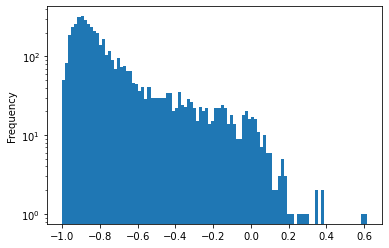

In [118]:
stream.pct_expr.plot.hist(bins = 100,logy = True)

# Looking at single cell data

In [3]:
anndata_file = '/Users/vyinkabanjo/Documents/UROP Stuff/Weissman Lab/CRISPRi Computational/K562_gwps_raw_singlecell_01.h5ad'

In [4]:
single_cell = sc.read_h5ad(anndata_file)

In [5]:
single_cell

AnnData object with n_obs × n_vars = 1989578 × 8248
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano'

In [6]:
print(single_cell.obs_names[:10].tolist())

['AAACCCAAGAAACCAT-157', 'AAACCCAAGAAACCAT-207', 'AAACCCAAGAAACCAT-29', 'AAACCCAAGAAAGCGA-149', 'AAACCCAAGAAATCCA-172', 'AAACCCAAGAACAAGG-215', 'AAACCCAAGAACAGGA-209', 'AAACCCAAGAACAGGA-54', 'AAACCCAAGAACCCGA-228', 'AAACCCAAGAACCCGA-48']


In [7]:
print(single_cell.var_names[:10].tolist())

['ENSG00000237491', 'ENSG00000228794', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000078808', 'ENSG00000176022', 'ENSG00000160087', 'ENSG00000131584']


In [8]:
print(single_cell.obs_names[-10:].tolist())

['TTTGTTGTCTTGGCTC-166', 'TTTGTTGTCTTGGCTC-86', 'TTTGTTGTCTTGTGCC-179', 'TTTGTTGTCTTGTTAC-124', 'TTTGTTGTCTTGTTAC-246', 'TTTGTTGTCTTTCCAA-201', 'TTTGTTGTCTTTCGAT-79', 'TTTGTTGTCTTTCTAG-218', 'TTTGTTGTCTTTGCGC-169', 'TTTGTTGTCTTTGCGC-213']


In [9]:
print(single_cell.var_names[-10:].tolist())

['ENSG00000198840', 'ENSG00000212907', 'ENSG00000198886', 'ENSG00000198786', 'ENSG00000198695', 'ENSG00000198727', 'ENSG00000278704', 'ENSG00000278384', 'ENSG00000271254', 'ENSG00000276345']
